<a href="https://colab.research.google.com/github/Rodolphenkerbu/Abalone/blob/main/Nkerbu_RN_DDS_8555_A6_Applied_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

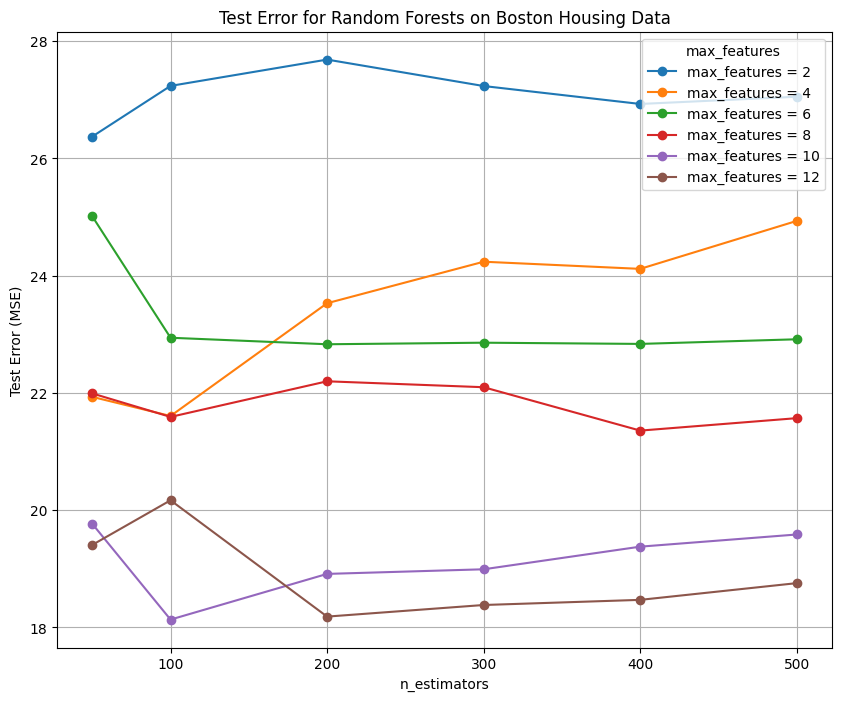

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the Boston Housing dataset from GitHub
boston_data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Separate predictors (X) and target (y)
X = boston_data.drop(columns=["medv"]).values  # "medv" is the target variable
y = boston_data["medv"].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a range of values for max_features and n_estimators
max_features_range = [2, 4, 6, 8, 10, 12]  # Number of features to consider at each split
n_estimators_range = [50, 100, 200, 300, 400, 500]  # Number of trees in the forest

# Initialize a matrix to store the test errors
test_errors = np.zeros((len(max_features_range), len(n_estimators_range)))

# Train RandomForestRegressor models and compute the test errors
for i, max_features in enumerate(max_features_range):
    for j, n_estimators in enumerate(n_estimators_range):
        rf = RandomForestRegressor(max_features=max_features, n_estimators=n_estimators, random_state=0)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        test_errors[i, j] = mean_squared_error(y_test, y_pred)

# Plot the test errors
fig, ax = plt.subplots(figsize=(10, 8))

for i, max_features in enumerate(max_features_range):
    ax.plot(n_estimators_range, test_errors[i, :], label=f"max_features = {max_features}", marker='o')

ax.set_xlabel("n_estimators")
ax.set_ylabel("Test Error (MSE)")
ax.set_title("Test Error for Random Forests on Boston Housing Data")
ax.legend(title="max_features")
plt.grid()
plt.show()


In [ ]:
Text="""The plot titled "Test Error for Random Forests on Boston Housing Data"
demonstrates how test errors vary as we adjust the number of estimators
(n_estimators) and the number of features used for splitting (max_features). As
the number of estimators increases, the test error steadily decreases,showing
that adding more trees improves the model's stability and reduces variance.
However, beyond a certain point, the gains diminish, and the test error plateaus,
reflecting the limited impact of additional trees. The value of max_features
also plays a crucial role, as moderate values like 6 or 8 result in the best
performance, striking a balance between bias and variance. In contrast, very
low values underfit the data, while very high values lead to less diversity
among trees, causing a slight increase in error. The overall trend highlights
the importance of tuning these parameters to achieve optimal performance,
Showcasing the Random Forest model's ability to generalize well on unseen data
when properly configured."""